# ELE510 Image Processing with robot vision: LAB, Exercise 1, Fundamentals.

### Daniel Fylling 

## Abstract

The assignment aims to provide foundational knowledge and practical experience in working with digital images using Python and popular libraries like OpenCV, NumPy, and Matplotlib. This exercise focuses on the fundamental aspects of digital images, including image properties, thresholding, and basic image analysis.



## Problem 1

**a)** What does a pixel value represent? What is the standard bit depth and why is it the common practice?

An 8-bit pixel value for a gray scale image would represent the brightness of the pixel on a scale from 0 to 255, where 0 is completely black and 255 is completely saturated / white.
8 bit pixel depth is commonly used and I suspect it is used to match the human visual system. Adding one more bit to 9 bits would divide the gray scale into 512 parts rather than 256, but if this means that two following gray sccales look indistinguishable to the human eye that last bit was wasted.

**b)** What is the difference between image processing and image analysis? What primary problems are they trying to solve?


Image processing inputs an image and outputs some enhanced version of the image. Image analysis aims to extract imformation from the image and typically outputs numbers or other insights.

**c)** Given a storage space of 512 GB, we would like to save a digital video recorded in grayscale that fills all the available memory. The video was recorded with no compression, a frame rate of 100 frames per second, and an image frame of $2048 \times 1024$ pixels. Then, how long would the lenght of the video be in time? Please provide an answer in HH:MM:SS format.

In [2]:
import numpy as np

pixels_in_frame = 2048*1024
bits_per_frame = pixels_in_frame*8
bits_per_second = bits_per_frame*100
available_bits = 512*1024**3*8
seconds_of_film = available_bits/bits_per_second

hours_of_film = np.floor(seconds_of_film/3600)
remaining_seconds = seconds_of_film - hours_of_film*3600
minutes_of_film = np.floor(remaining_seconds/60)
remaining_seconds = remaining_seconds - minutes_of_film*60

print(f'Length of film is {hours_of_film:.0f}:{minutes_of_film:.0f}:{remaining_seconds:.0f}')

Length of film is 0:43:41



## Problem 2

In this problem we use one image, `flower.jpg` (relative path: `./images/flower.jpg`).


**a)** Import the image; let the name of the flower image be **A**. Find the following properties: height, width, channels, filesize [+]. Be aware tha opencv represents image colar channel in the order BGR (blue, green, red) instead of RGB as is more common.  Matplotlib use RGB, so if we are using matplotlib to show images they need to be converted first.

In [2]:
# Import useful packages
import os # useful for the filesize
import cv2
import matplotlib.pyplot as plt 

# Import the image, which is located in the folder images/ (you can download it from CANVAS)
A_path = './images/flower.jpg'
A = cv2.imread(A_path) 

# Convert the image from BGR (OpenCV standard) to RGB (standard)  
A = cv2.cvtColor(A, cv2.COLOR_BGR2RGB)

# image properties
height, width, channels = A.shape
filesize = os.path.getsize(A_path)
 
print('Image Dimension    : ', A.shape) 
print('Image Height       : ', height)
print('Image Width        : ', width)
print('Number of Channels : ', channels)

## The results should be:
# Image Dimension    :  (667, 500, 3)
# Image Height       :  667
# Image Width        :  500
# Number of Channels :  3


Image Dimension    :  (667, 500, 3)
Image Height       :  667
Image Width        :  500
Number of Channels :  3


### Problem 2 b)
Image **A** is represented as a 3D array in Python. With **A** as input we now want to extract 4 different 2D images:
   - **R** representing the red colour component, 
   - **G** representing the green colour component,
   - **B** representing the blue colour component, and
   - **Gr** representing a grey level version.
    
The rgb components are found by using `A[:,:,k]` where `k=1,2 and 3`. The grey level image can be imported using a particular flag (`cv2.IMREAD_GRAYSCALE`), or converted from an already imported color-image to grayscale (find the cv2 function yourself in the documentation). Use `matplotlib` to display the colour image and the 3 colour components in the same figure.

Describe how the different colour components contributes to different parts of the image (the petals and the background). Show the gray level image in a separate figure. Describe this image in relation to the colour components.


<div class="alert alert-block alert-info">
    The filesize can be checked in <b>bytes</b> using the following commands: 

```python
import os 
filesize = os.path.getsize(my_path)
```
</div>


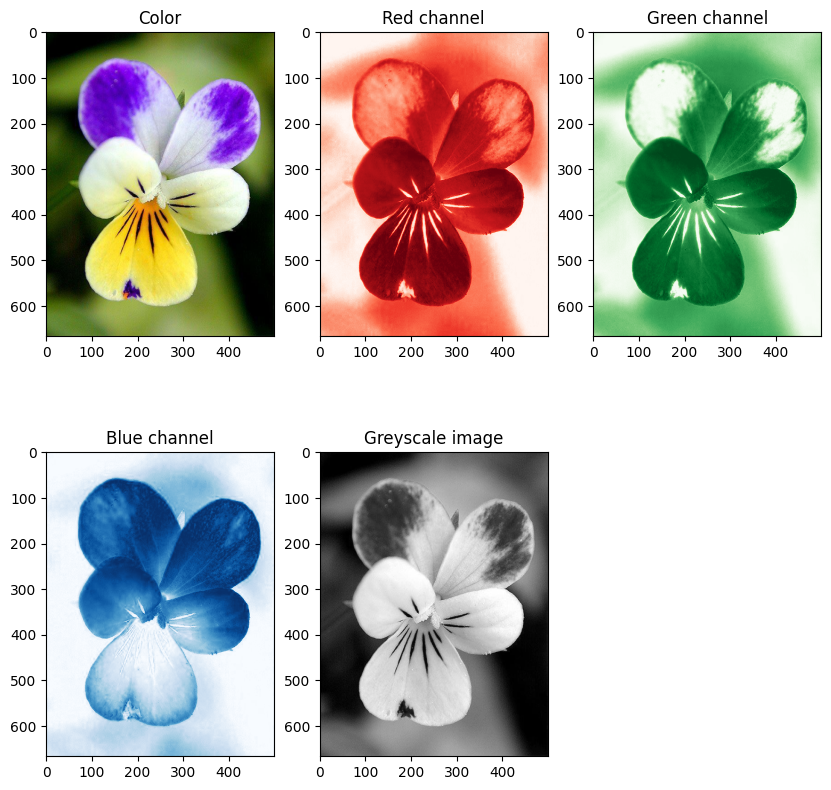

In [3]:
# Extract 2D images (the various channels + grayscale)
R = A[:,:,0]
G = A[:,:,1]
B = A[:,:,2]

plt.figure(figsize=(10,10))
plt.subplot(231)
plt.imshow(A)
plt.title('Color')
plt.subplot(232)
plt.imshow(R, cmap='Reds')
plt.title('Red channel')
plt.subplot(233)
plt.imshow(G, cmap='Greens')
plt.title('Green channel')
plt.subplot(234)
plt.imshow(B, cmap= 'Blues')
plt.title('Blue channel')

# Greyscale image
Gr = cv2.imread(A_path, cv2.IMREAD_GRAYSCALE)
plt.subplot(235)
plt.imshow(Gr, cmap='gray', vmin=0, vmax=255)
plt.title('Greyscale image')
plt.show()


**Describe how the different colour components contributes to different parts of the image (the petals and the background).**

For light intenstiy we can notice that where the main image is dark, the composite images are bright/white. The 'cmap' functions that are used have white as the default color at no signal '0' and fully saturated color, f.ex. 'red' at max signal, 255. We can see that in bright/white areas of the main image, all separate colors give high output. This is how white light is constructed through RGB-pixels in the computer screen. Lastly we can notice the special case of the big yellow petal. We see that both red and green give high signals here, but there is hardly any blue light in the mix. This is how yellow light is mimiced by computer screens based on how our eyes work.

Describe gray scale image in relation to the colour components.

The main unexpected thing about the gray scale image to me is that the big yellow patel is almost completely white, rather than more gray as I might have expected. I suspect this may be related to the green component being given a higher weight in the conversion process, so the resulting combined signal is higher. By looking at the top 2 petals we can see that it has a relatively high signal from both red and blue channels, but still appear very dark in the gray scale image - possibly due to the same weighting.

### Problem 2 c)
The image data can be written to new files with a chosen format. Use `cv2.imwrite` and JPG. We want to study different degrees of compression by using `[cv2.IMWRITE_JPEG_QUALITY, jpg_quality]` as option in the `cv2.imwrite` function, where `cv2.IMWRITE_JPEG_QUALITY` is the quality flag, and `jpg_quality` is the selected quality for saving the image. Let `jpg_qualities` be `[25,50,75,100]` and make a graph that show the filesize in kB as a function of `jpg_qualities` for this image. When a repeated procedure is done, like in this case, it is efficient to make a script or a function for the problem. Display the compressed images for `jpg_qualities=25` and `jpg_qualities=75` (use `plt.imshow`). Study these images and discuss the degradation of the images caused by the compression.

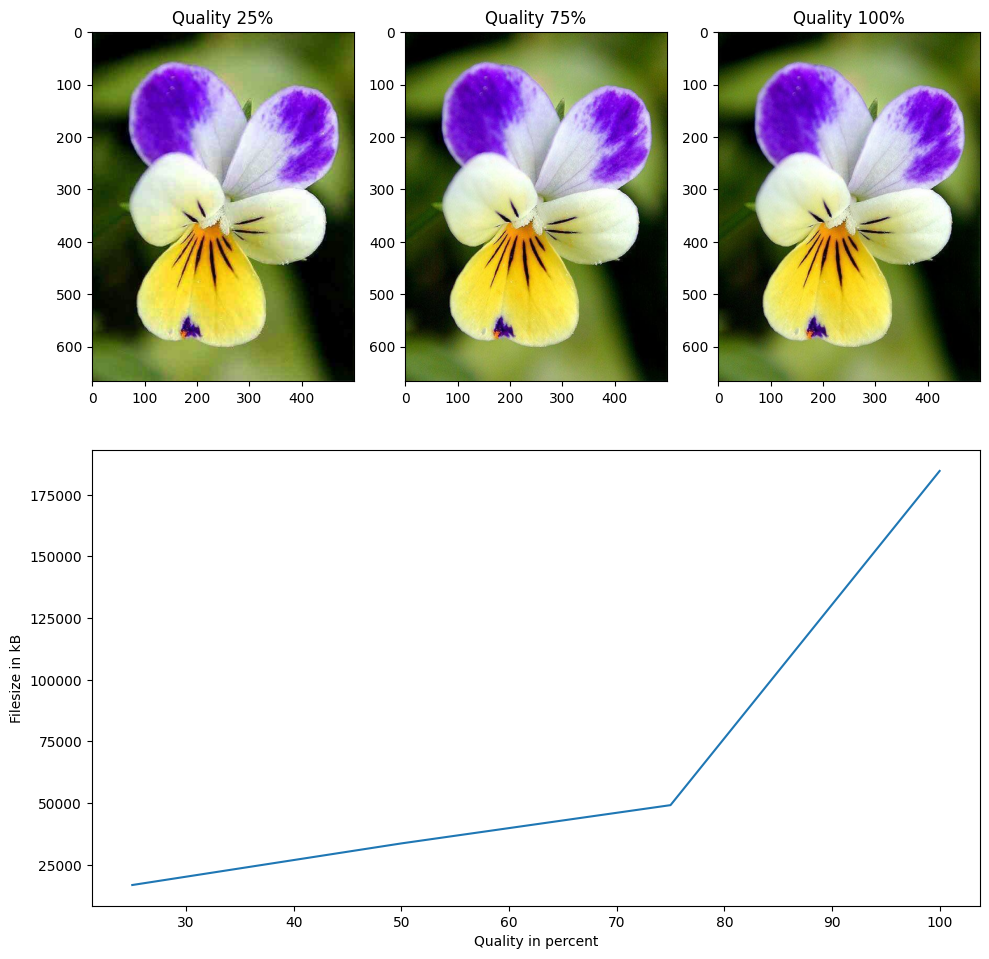

In [4]:
# Image compression
jpg_qualities = [25,50,75,100]
sizes = []
images = []


for jpg_quality in jpg_qualities:
    # write the images with a specific quality
    file_path = f'./images/flower{jpg_quality}.jpg'
    cv2.imwrite(file_path, A, [cv2.IMWRITE_JPEG_QUALITY, jpg_quality])

    # append new images to collector variable
    images.append(cv2.imread(file_path))

    # find and collect image sizes
    filesize = os.path.getsize(file_path)
    sizes.append(filesize)

plt.figure(figsize=(10,10))
plt.subplot(212)
plt.plot(jpg_qualities, sizes) # Show the plot for the filesize in kB of the images generated
plt.xlabel("Quality in percent")
plt.ylabel("Filesize in kB")
plt.subplot(231)
plt.imshow(images[0])
plt.title("Quality 25%")
plt.subplot(232)
plt.imshow(images[2])
plt.title("Quality 75%")
plt.subplot(233)
plt.imshow(images[3])
plt.title("Quality 100%")
plt.tight_layout()


**Study these images and discuss the degradation of the images caused by the compression.**
1. Comparing 75% image to original image, they seem quite similar. Both images have some "grainy" quality to them and the respective file sizes are even the same, 48kB. I don't know how jpeg compression works, but I speculate that maybe the quality of the original image might have been 75% as well. 
2. Comparing 75% image to 100% image. No noticable difference in image quality, though file sizes are 48 / 180 kB respectively. It seems that most of the added information to the 100% is redundant compared to 75%.
3. Comparing 75% image to 25% image. There is a small but noticable difference in image quality, at the same time the size difference is of order 3, at 16 / 48 kB. Which quality is preferrable would be up to the usage. The lower quality image can just as easily be identified as a flower/pansy as the other, but the higher quality would be preferred if the image was to be displayed for decorative purposes.

### Problem 2 d)
A simple way of finding objects in an image is by using thresholding. The OpenCV function `threshold`. performs simple thresholding and ouputs a logical image matrix. We want to find a logical mask identifying the flower (foreground and not the background) in our image. We can do that by combining the result from thresholding the green component and the red component, `Fmask = Gmask or Rmask`. `Gmask` is the output from thresholding the green component with a level of approximately (180/255) and `Rmask` is the result from thresholding the red component with level (150/255) approximately. Execute these operations and adjust the two levels for the best result. Display the final logical image `Fmask` and describe the result.

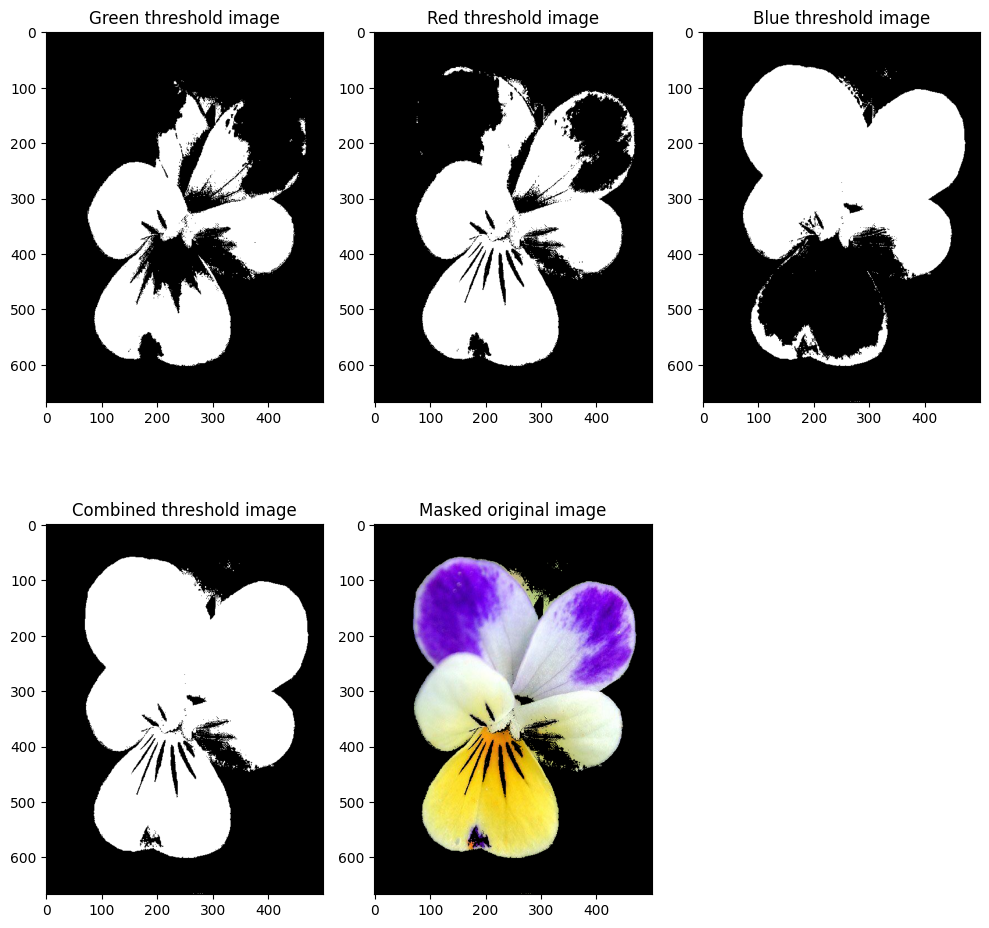

In [5]:
# Thresholding: Black and White (binary) images

# _, means that we are skipping the first output.  
# look in OpenCV documentation to find out what the first output of threshold is
_, Gmask = cv2.threshold(G, 195, 255, cv2.THRESH_BINARY)
_, Rmask = cv2.threshold(R, 185, 255, cv2.THRESH_BINARY)
_, Bmask = cv2.threshold(B, 125, 255, cv2.THRESH_BINARY)
Fmask = np.logical_or(np.logical_or(Gmask, Rmask), Bmask)

plt.figure(figsize=(10,10))
plt.subplot(231)
plt.imshow(Gmask, cmap='gray', vmin=0, vmax=255)
plt.title('Green threshold image')
plt.subplot(232)
plt.imshow(Rmask, cmap='gray', vmin=0, vmax=255)
plt.title('Red threshold image')
plt.subplot(233)
plt.imshow(Bmask, cmap='gray', vmin=0, vmax=255)
plt.title('Blue threshold image')
plt.subplot(234)
plt.imshow(Fmask, cmap='gray')
plt.title('Combined threshold image')

A_masked = A.copy()
A_masked[~Fmask] = 0

plt.subplot(235)
plt.imshow(A_masked)
plt.title('Masked original image')
plt.tight_layout()

**Display the final logical image `Fmask` and describe the result.**

After trying to catch the shape of the flower with only the red and green channels I could not resist to add the blue channel as well. Even after adding the blue channel I was not able to find a configuration of thresholds that would keep the full flower and omit the entire background. The result above is as colse as I could get.

As can be seen a bit of the right white petal is missing and some of the green background above the flower is present. Fully removing the green bit would cause the missing area on the petal to grow and vice versa. This was true for all channels in this case.

The below code explores how close we can get by using red and green channels only. As can be seen, the blue part of the petals quickly fades as thresholds are increased.


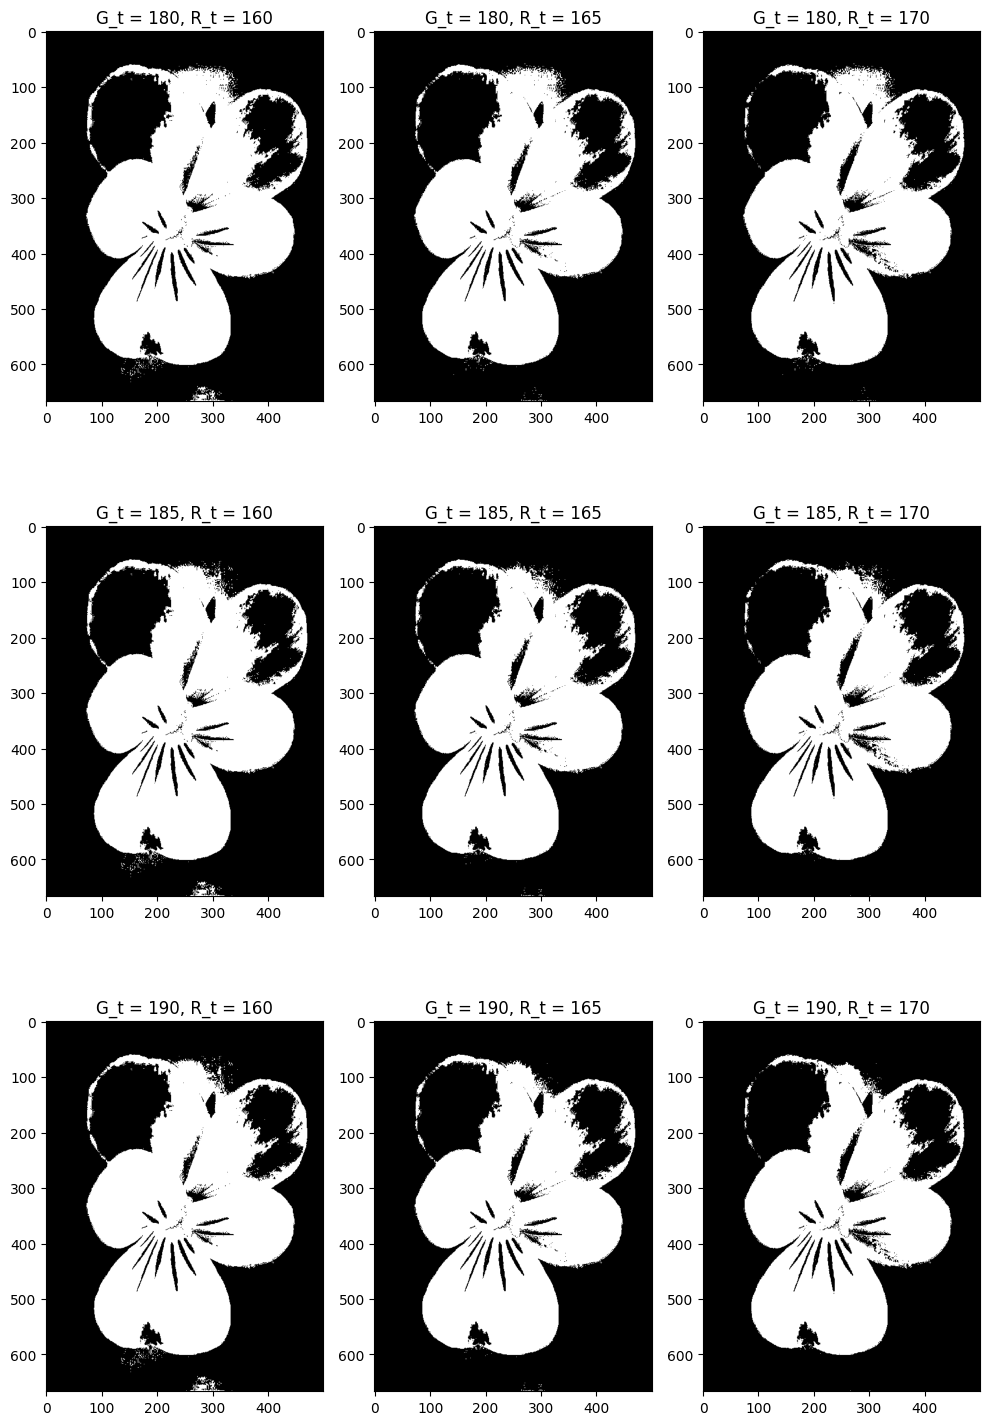

In [6]:
plt.figure(figsize=(10,15))

G_thresholds = np.arange(180,191,5) # base 180
R_thresholds = np.arange(160,171,5) # base 150

for i, G_threshold in enumerate(G_thresholds):
    for j, R_threshold in enumerate(R_thresholds):
        _, Gmask = cv2.threshold(G, G_threshold, 255, cv2.THRESH_BINARY)
        _, Rmask = cv2.threshold(R, R_threshold, 255, cv2.THRESH_BINARY)
        Fmask = np.logical_or(Gmask, Rmask)

        plt.subplot(len(G_thresholds), len(R_thresholds), i*len(R_thresholds) + j + 1)
        plt.imshow(Fmask, cmap='gray')
        plt.title(f'G_t = {G_threshold}, R_t = {R_threshold}')

plt.tight_layout()


## Problem 3

Write a function that extracts a rectangular region from an input image, commonly known as cropping. Give the function the name **image2roi** (roi = region of interest). Let this function work as follows:

**a)** Input parameters should be an image and the coordinates for the roi (fname, coords). First check if the image is colour or grey level. If it is colour a message should be printed out and the function closed (return). If it is a grey level image continue to the next step, **b)**.

**b)** The size of the image is computed and the image displayed with indexes shown along the axis. Extract the sub image (region of interest) given the coordinates, display it and the function ended.



In [7]:
'''
Function that takes in input an image and the coordinates for the ROI
img is a grey scale image - one layer
coords is given as numpy array of form: [xmin, xmax, ymin, ymax]
coordinate 0,0 is at the top left corner of the image

''' 
def image2roi(img, coords):
    
    if len(img.shape)>2:
        print('Enter gray scale image only')

    h, w = img.shape
    xmin, xmax, ymin, ymax = coords

    if np.any(coords < 0):
        return print('Only positve coordinates')
    if np.logical_or(xmin>xmax, ymin>ymax):
        return print('Invalid coordinate range')
    if np.logical_or(xmax>w, ymax>h):
        return print('Max coordinate outside image')

    # Plot the greyscale image and the ROI based on the coords values
    plt.imshow(img[ymin:ymax, xmin:xmax], cmap='gray')
    plt.title('Cropped image')
    


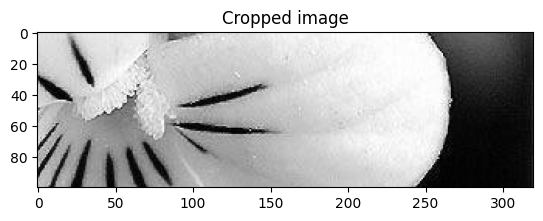

In [8]:
##  To test your function, complete the following lines:

coords = np.array([180, 500, 320, 420])
img = Gr  # use the flower image or something else you want. 

image2roi(img, coords)

In [8]:
Gr

array([[53, 28, 44, ..., 82, 86, 93],
       [31,  5, 20, ..., 69, 73, 79],
       [40, 12, 24, ..., 69, 73, 80],
       ...,
       [90, 72, 81, ..., 10, 14, 20],
       [82, 64, 73, ...,  2,  6, 12],
       [97, 79, 88, ..., 23, 27, 33]], dtype=uint8)

## Problem 4

`NumPy` is a `Python` library that's vital for computer vision. It handles arrays and math efficiently. It's used to represent images, apply filters, and prepare data for computer vision tasks. To explore this, let an image be:


\begin{equation}
    F(x,y) = \begin{bmatrix} 1 & 2 & 3 & 4\\ 5 & 6 & 7 & 8\\
     9 & 10 & 11 & 12\\ 13 & 14 & 15 & 16\end{bmatrix},
\end{equation}


To produce this image with `numpy`, use:

```python
F = np.matrix('1 2 3 4;5 6 7 8;9 10 11 12;13 14 15 16')
```

**a)** Use `numpy` to retrieve the first element of the first column, the first column and the first row. Do the same for the last column and row.

**b)** Use the `numpy` function `reshape` to reconstruct the image matrix into any other shape. Refer to [numpy.reshape](https://numpy.org/doc/1.18/reference/generated/numpy.reshape.html#numpy.reshape) for full documentation.

**c)** Use `numpy` to create a boolean array that contains the value `True` for values multiple of 5 and bigger than 6.  



In [9]:
# Import useful packages
import numpy as np
from pprint import pprint

F = np.matrix('1 2 3 4;5 6 7 8;9 10 11 12;13 14 15 16')
print("F:")
pprint(F)

######## a)
f_ele = F[0,0]
f_row = F[0,:]
f_col = F[:,0]
print("f_ele: ")
pprint(f_ele)
print("f_row: ")
pprint(f_row) 
print("f_col: ")
pprint(f_col)

l_row = F[-1,:]
l_col = F[:,-1]
print("l_row: ")
pprint(l_row) 
print("l_col: ")
pprint(l_col)

F:
matrix([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16]])
f_ele: 
1
f_row: 
matrix([[1, 2, 3, 4]])
f_col: 
matrix([[ 1],
        [ 5],
        [ 9],
        [13]])
l_row: 
matrix([[13, 14, 15, 16]])
l_col: 
matrix([[ 4],
        [ 8],
        [12],
        [16]])


In [10]:
######## b)
f_res = np.reshape(F, (2,8))
print("f_res: ")
pprint(f_res)

######## c)
f_bool = np.logical_and(F % 5 == 0, F > 6)
print("f_bool: ")
pprint(f_bool)

f_res: 
matrix([[ 1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16]])
f_bool: 
matrix([[False, False, False, False],
        [False, False, False, False],
        [False,  True, False, False],
        [False, False,  True, False]])


Problem 4, answers:

**a)** I think this is called slicing and is the same technique that was used to create the cropping function in previous problem.

**b)** Reshaping an image like the flower does not really make sense to me (yet). Looking forward to seeing the application of this operation in image processing.

**c)** This is the same concept as was used to combine the different threshold masks in Problem 2.


### Delivery (dead line) on CANVAS: 08-09-2023 at 23:59


## Contact
### Course teacher
Professor Kjersti Engan, room E-431,
E-mail: kjersti.engan@uis.no

### Teaching assistant
Jorge Garcia-Torres Fernandez, room E-401
E-mail: jorge.garcia-torres@uis.no


Saul Fuster Navarro, room E-401
E-mail: saul.fusternavarro@uis.no


## References

[1] S. Birchfeld, Image Processing and Analysis. Cengage Learning, 2016.

[2] I. Austvoll, "Machine/robot vision part I," University of Stavanger, 2018. Compendium, CANVAS.